<a href="https://colab.research.google.com/github/marrs-lab/ocean_color/blob/main/landsat8_chla_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Processing Landsat 8 Imagery into Chlorophyll-a

This follows the NASA ATBD and processes L8 imagery into chl-a. Ideally this will be applied to the (provisional) Aquatic Reflectance Product USGS has recently released: 

https://www.usgs.gov/core-science-systems/nli/landsat/landsat-provisional-aquatic-reflectance



In [ ]:
## load the imagery in via rasterio

# reshape to a vector for each image

# run the l2_chlor algorithm on each pixel

# reshape back to an image

# plot the img

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

Pull in all the imagery via xarray's rasterio module

In [2]:
band1 = xr.open_rasterio('LC08_L1TP_013036_20200309_20200314_01_T2_ar_band1.tif').isel(band=0,y=slice(500,3000),x=slice(1000,4800))
band2 = xr.open_rasterio('LC08_L1TP_013036_20200309_20200314_01_T2_ar_band2.tif').isel(band=0,y=slice(500,3000),x=slice(1000,4800))
band3 = xr.open_rasterio('LC08_L1TP_013036_20200309_20200314_01_T2_ar_band3.tif').isel(band=0,y=slice(500,3000),x=slice(1000,4800))
band4 = xr.open_rasterio('LC08_L1TP_013036_20200309_20200314_01_T2_ar_band4.tif').isel(band=0,y=slice(500,3000),x=slice(1000,4800))
therm = xr.open_rasterio('LC08_L2SP_013036_20200309_20200822_02_T1_ST_B10.TIF').isel(band=0,y=slice(500,3000),x=slice(1000,4800))

In [3]:
band1 = band1.where(band1 != -9999)
band2 = band2.where(band2 != -9999)
band3 = band3.where(band3 != -9999)
band4 = band4.where(band4 != -9999)
therm = therm.where(therm != 0)

In [4]:
band1

<xarray.DataArray (y: 2500, x: 3800)>
array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [2259., 2245., 2221., ..., 1707., 1718., 1685.],
       [2230., 2209., 2185., ..., 1729., 1746., 1721.],
       [2243., 2210., 2189., ..., 1702., 1728., 1718.]])
Coordinates:
    band     int64 1
  * y        (y) float64 3.932e+06 3.932e+06 3.932e+06 ... 3.857e+06 3.857e+06
  * x        (x) float64 4.098e+05 4.098e+05 4.099e+05 ... 5.237e+05 5.238e+05
Attributes:
    transform:      (30.0, 0.0, 379785.0, 0.0, -30.0, 3946815.0)
    crs:            +init=epsg:32618
    res:            (30.0, 30.0)
    is_tiled:       0
    nodatavals:     (-9999.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    descriptions:   ('band 1 aquatic reflectance',)
    AREA_OR_POINT:  Area
    Band_1:         band 1 aquatic reflectance

In [5]:
therm

<xarray.DataArray (y: 2500, x: 3800)>
array([[   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       ...,
       [41663., 41663., 41666., ..., 43587., 43594., 43598.],
       [41672., 41670., 41672., ..., 43580., 43585., 43590.],
       [41679., 41677., 41677., ..., 43575., 43579., 43582.]])
Coordinates:
    band     int64 1
  * y        (y) float64 3.932e+06 3.932e+06 3.932e+06 ... 3.857e+06 3.857e+06
  * x        (x) float64 4.101e+05 4.101e+05 4.102e+05 ... 5.24e+05 5.241e+05
Attributes:
    transform:      (30.0, 0.0, 380085.0, 0.0, -30.0, 3946815.0)
    crs:            +init=epsg:32618
    res:            (30.0, 30.0)
    is_tiled:       1
    nodatavals:     (0.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Point

Reflectance is scaled by 0.00001

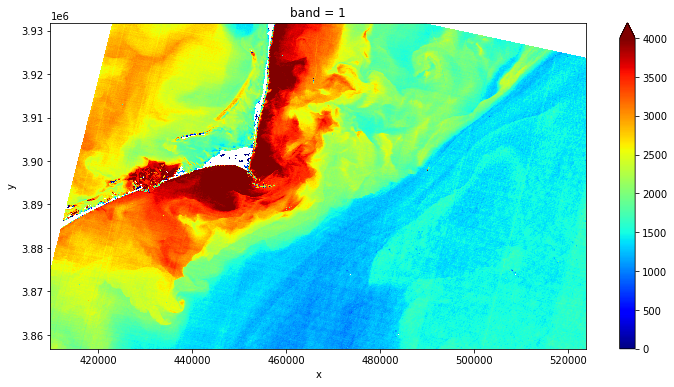

In [10]:
fig,ax=plt.subplots(figsize=(12,6))
band1.plot(vmin=0, vmax=4000, cmap='jet',ax=ax)

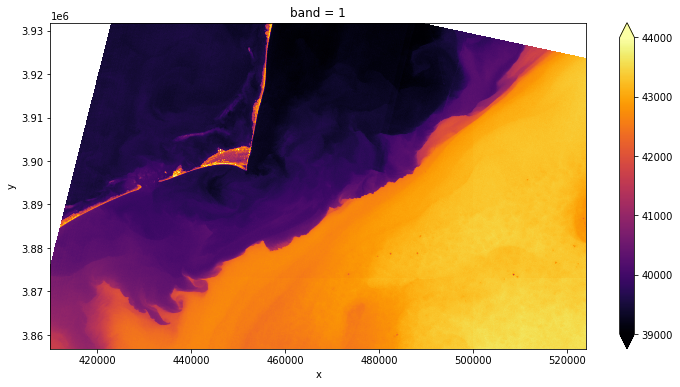

In [9]:
fig,ax=plt.subplots(figsize=(12,6))
therm.plot(vmin=39000, vmax=44000, cmap='inferno',ax=ax)

Rescaling thermal band to TOA brightness temp using values from the metadata


In [12]:
therm = (therm*0.0003342)+0.1

In [13]:
therm

<xarray.DataArray (y: 2500, x: 3800)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [14.0237746, 14.0237746, 14.0247772, ..., 14.6667754, 14.6691148,
        14.6704516],
       [14.0267824, 14.026114 , 14.0267824, ..., 14.664436 , 14.666107 ,
        14.667778 ],
       [14.0291218, 14.0284534, 14.0284534, ..., 14.662765 , 14.6641018,
        14.6651044]])
Coordinates:
    band     int64 1
  * y        (y) float64 3.932e+06 3.932e+06 3.932e+06 ... 3.857e+06 3.857e+06
  * x        (x) float64 4.101e+05 4.101e+05 4.102e+05 ... 5.24e+05 5.241e+05

In [14]:
# unsure if I need to do this solar angle calculation but it is accouting for sun elevation
# don't believe so...
import math
#therm = therm / np.sin(math.radians(45.21160346))

In [15]:
# continued scaling from metadata
# K1_CONSTANT_BAND_10 = 774.8853
k1 = 774.8853
# K2_CONSTANT_BAND_10 = 1321.0789
k2 = 1321.0789
therm = k2 / np.log((k1 / therm) + 1)

In [16]:
# keeping it in Kelvin degrees C is:
therm - 273.15

<xarray.DataArray (y: 2500, x: 3800)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [54.66952013, 54.66952013, 54.67523236, ..., 58.2896213 ,
        58.30263762, 58.31007503],
       [54.68665618, 54.68284833, 54.68665618, ..., 58.27660388,
        58.28590215, 58.29519986],
       [54.69998287, 54.69617536, 54.69617536, ..., 58.26730506,
        58.27474416, 58.28032326]])
Coordinates:
    band     int64 1
  * y        (y) float64 3.932e+06 3.932e+06 3.932e+06 ... 3.857e+06 3.857e+06
  * x        (x) float64 4.101e+05 4.101e+05 4.102e+05 ... 5.24e+05 5.241e+05

(array([1.675000e+03, 6.601630e+05, 3.800374e+06, 2.035899e+06,
        1.394307e+06, 5.959730e+05, 3.016050e+05, 9.649000e+03,
        1.140000e+02, 4.400000e+01]),
 array([   0. ,  628.3, 1256.6, 1884.9, 2513.2, 3141.5, 3769.8, 4398.1,
        5026.4, 5654.7, 6283. ]),
 <a list of 10 Patch objects>)

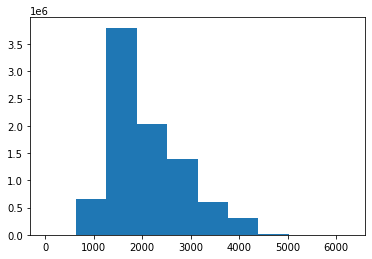

In [17]:
plt.hist(np.array(band1).flatten())

(array([2.212634e+06, 1.619520e+06, 6.820710e+05, 2.512780e+05,
        2.089960e+05, 9.331060e+05, 1.973740e+06, 1.049780e+06,
        2.240000e+02, 1.100000e+01]),
 array([322.55775043, 323.7541691 , 324.95058777, 326.14700644,
        327.34342511, 328.53984378, 329.73626245, 330.93268112,
        332.12909979, 333.32551846, 334.52193713]),
 <a list of 10 Patch objects>)

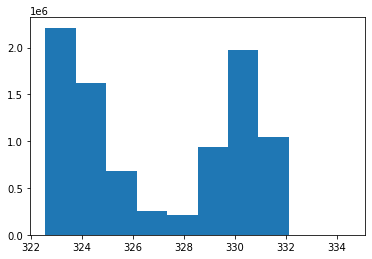

In [18]:
plt.hist(np.array(therm).flatten())

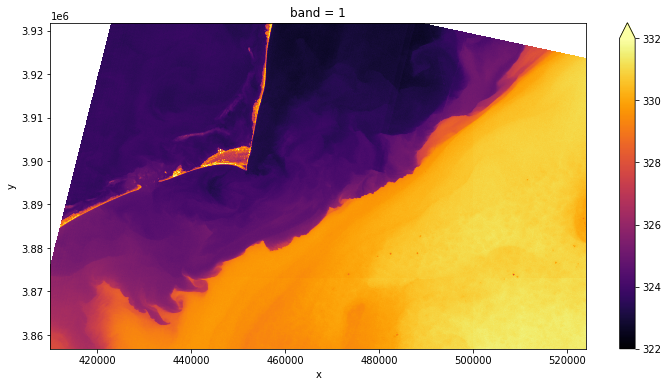

In [19]:
fig,ax=plt.subplots(figsize=(12,6))
therm.plot(vmin=322, vmax=332, cmap='inferno',ax=ax)

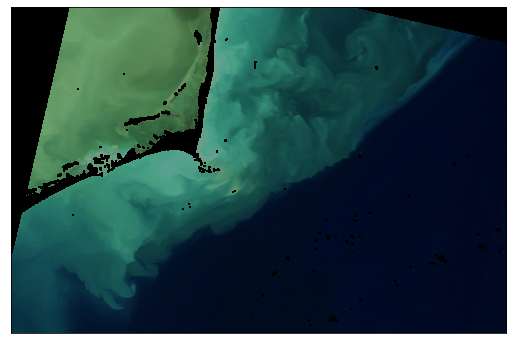

In [31]:
fig,ax = plt.subplots(figsize=(12,6))
ax.imshow(np.array((band4.T,band3.T,band2.T)).T/10000)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('rgb_img.png',dpi=300)

Run the NASA chlorophyll algorithm using algorithm coefficients for L8 from https://oceancolor.gsfc.nasa.gov/atbd/chlor_a/


In [21]:
# get the max blue band
mbr = np.maximum(band1, band2)
mbr.shape

(2500, 3800)

In [22]:
# landsat 8 coefs
a0 = 0.2412
a1 = -2.0546
a2 = 1.1776
a3 = -0.5538
a4 = -0.4570

log10chl = a0 + a1 * (np.log10(mbr / band3)) \
    + a2 * (np.log10(mbr / band3))**2 \
        + a3 * (np.log10(mbr / band3))**3 \
            + a4 * (np.log10(mbr / band3))**4

oc3m = np.power(10, log10chl)

/usr/local/lib/python3.6/dist-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/usr/local/lib/python3.6/dist-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/usr/local/lib/python3.6/dist-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/usr/local/lib/python3.6/dist-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [23]:
oc3m

<xarray.DataArray (y: 2500, x: 3800)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.86099308, 0.85626201, 0.85457658, ..., 0.16582573, 0.16943841,
        0.16258664],
       [0.86762766, 0.86262477, 0.8591536 , ..., 0.17234262, 0.17689166,
        0.16760315],
       [0.8683062 , 0.8624288 , 0.86098927, ..., 0.17344878, 0.17991719,
        0.17146281]])
Coordinates:
    band     int64 1
  * y        (y) float64 3.932e+06 3.932e+06 3.932e+06 ... 3.857e+06 3.857e+06
  * x        (x) float64 4.098e+05 4.098e+05 4.099e+05 ... 5.237e+05 5.238e+05

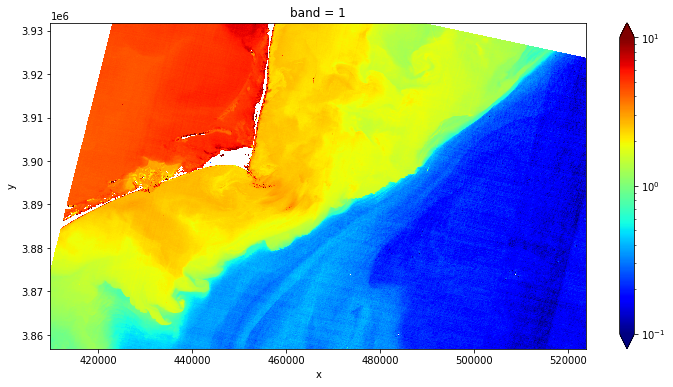

In [24]:
fig,ax = plt.subplots(figsize=(12,6))
oc3m.plot(norm=LogNorm(vmin=0.1, vmax=10), cmap='jet',ax=ax)

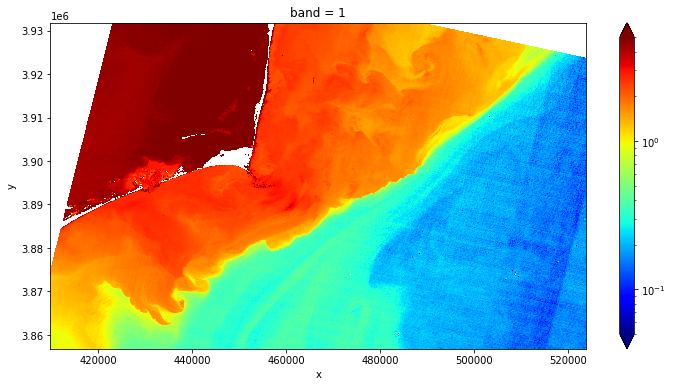

In [28]:
fig,ax = plt.subplots(figsize=(12,6))
oc3m.plot(norm=LogNorm(vmin=0.05, vmax=5), cmap='jet',ax=ax)
fig.savefig('chla_wall.png',dpi=300)

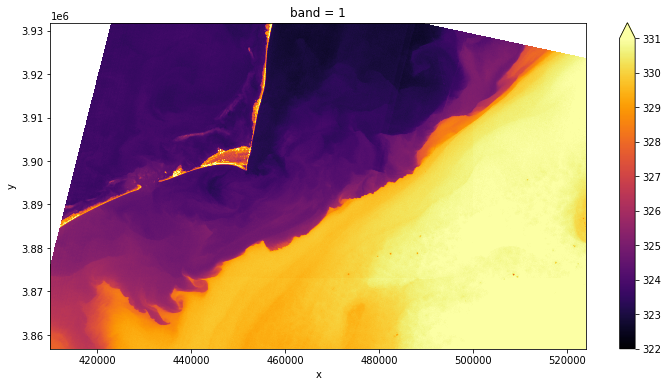

In [29]:
fig,ax = plt.subplots(figsize=(12,6))
therm.plot(ax=ax, cmap='inferno',vmin=322, vmax=331)
fig.savefig('thermal_wall.png',dpi=300)

In [33]:
oc3m.shape

(2500, 3800)

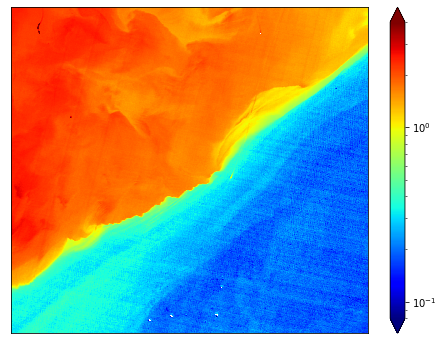

In [57]:
fig,ax = plt.subplots(figsize=(8,6))
oc3m[350:1850,1750:3250].plot(norm=LogNorm(vmin=0.08, vmax=4), cmap='jet',ax=ax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("")
ax.set_ylabel("")
ax.set_xlabel("")
fig.savefig('chla_wall_zoom_gridless.png',dpi=300, transparent=True)

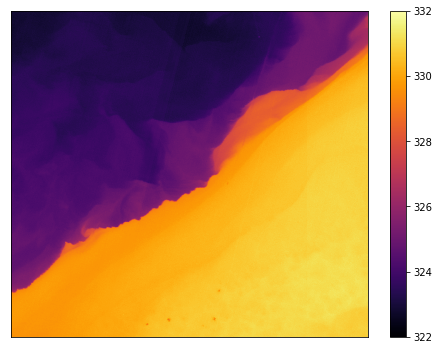

In [56]:
fig,ax = plt.subplots(figsize=(8,6))
therm[350:1850,1750:3250].plot(ax=ax, cmap='inferno',vmin=322, vmax=332)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("")
ax.set_ylabel("")
ax.set_xlabel("")
fig.savefig('thermal_wall_zoom_gridless.png',dpi=300, transparent=True)